In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.utils import data
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
from utils.models import ResNet50
from utils.Dataset import CustomAugmentation
from torchvision.datasets import ImageFolder

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
model = ResNet50(pretrained=True)
model.load_state_dict(torch.load('./saved/best2.pt'))
model = model.model
softmax = nn.Softmax()

In [3]:
transform = CustomAugmentation('val')
dataset = ImageFolder(root='../data/QCdataset/images/val', transform=transform)
dataloader = data.DataLoader(dataset=dataset, shuffle=False, batch_size=1)

In [5]:
img, label, mask, _ = next(iter(dataloader))
img.size(), label, np.array(label)[0], mask

ValueError: not enough values to unpack (expected 2, got 0)

In [5]:
model = model.to(device)
pred = model(img.to(device))
softmax(pred.to('cpu'))*100, pred.argmax(1)


/opt/conda/envs/lightweight/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


(tensor([[32.1171, 31.2154, 35.1099,  0.0355,  1.5221]], grad_fn=<MulBackward0>),
 tensor([2], device='cuda:0'))

In [6]:
rgb_img = img.reshape([3,224,224])
rgb_img = np.array(rgb_img)
rgb_img = rgb_img/rgb_img.max()
rgb_img = rgb_img.transpose(1,2,0)

In [7]:
target_layers = [model.layer4[-1]]
input_tensor = img
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=device)
target_category = np.array(label)

grayscale_cam = cam(input_tensor=input_tensor, target_category=target_category)

grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


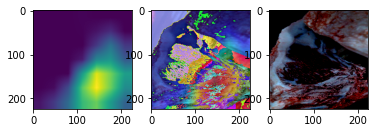

In [8]:
plt.subplot(1, 3, 1) 
plt.imshow(grayscale_cam)
plt.subplot(1, 3, 2) 
plt.imshow(visualization)
plt.subplot(1, 3, 3) 
plt.imshow(rgb_img)
plt.savefig('img1.jpg')

In [9]:
testaset = ImageFolder(root='../data/QCdataset/images/test', transform=transform)
testloader = data.DataLoader(dataset=testaset, shuffle=False, batch_size=1)

iter_data = iter(testloader)
img, label = (next(iter_data))
img, label = (next(iter_data))

target_layers = [model.layer4[-1]]
input_tensor = img
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=device)
target_category = np.array(label)

grayscale_cam = cam(input_tensor=input_tensor, target_category=target_category)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


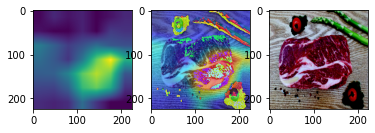

In [10]:
rgb_img = img.reshape([3,224,224])
rgb_img = np.array(rgb_img)
rgb_img = rgb_img/rgb_img.max()
rgb_img = rgb_img.transpose(1,2,0)

grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

plt.subplot(1, 3, 1) 
plt.imshow(grayscale_cam)
plt.subplot(1, 3, 2) 
plt.imshow(visualization)
plt.subplot(1, 3, 3) 
plt.imshow(rgb_img)
plt.savefig('img2.jpg')

In [11]:
grayscale_cam.shape

(224, 224)